In [56]:
from azure.ai.formrecognizer import DocumentAnalysisClient
from azure.core.credentials import AzureKeyCredential
import io
from PIL import Image
import replicate
from dotenv import load_dotenv


load_dotenv()

replicate = replicate.Client(api_token='r8_3Bap3zElUszqMy6QwIVRIF1zkWg6LUZ47Qbka') #replace with environment variable
def AzureReadModule(filename):
    endpoint = "https://quixyocr.cognitiveservices.azure.com/"
    key = "03462e450efa4e338d200900d30d8c7b"
    document_analysis_client = DocumentAnalysisClient(endpoint=endpoint, credential=AzureKeyCredential(key))

    ocr_module = "prebuilt-layout"
    poller = document_analysis_client.begin_analyze_document(
            ocr_module, filename) #, locale="en-US")
    
    pdf = pdfium.PdfDocument(filename)

    final = {}
    for table_idx, table in enumerate(poller.result().tables):
        table_dict = table.to_dict()
        page_number = table_dict['bounding_regions'][0]['page_number']
        height = poller.result().pages[page_number-1].height
        width = poller.result().pages[page_number-1].width
        page = pdf.get_page(page_number-1)
        pil_image = page.render(scale = 300/72).to_pil()
        img_size = pil_image.size
        pdf_size = (width,height)
        polygon = table_dict['bounding_regions'][0]['polygon']
        x1 , y1 = polygon[0]['x'], polygon[0]['y']
        x2 , y2 = polygon[2]['x'], polygon[2]['y']
        box = x1, y1, x2,y2
        
        crop_coordinates = convert_inches_to_pix(box, pdf_size,img_size)
        cropped_img = pil_image.crop(crop_coordinates)
        cropped_img.show()
        cropped_img.save(f'table_output/table{table_idx}.png')
        for idx in range(len(table_dict['cells'])):
            del table_dict['cells'][idx]['bounding_regions']
        final[table_idx] = table_dict

    return final, poller

def give_byte_arr(image_link:str):
    try:
        img = Image.open(image_link).convert('RGB')
        img_byte_arr = io.BytesIO()
        img.save(img_byte_arr, format='PDF')
        img_byte_arr = img_byte_arr.getvalue()
    except:
        with open(image_link, 'rb') as file:
            img_byte_arr = file.read()
    return img_byte_arr

def convert_inches_to_pix(bbox, pdf_size,img_size):
   x1, y1, x2, y2 = bbox
   x1_, x2_ = x1 * img_size[0] /pdf_size[0] , x2 * img_size[0] /pdf_size[0]
   y1_, y2_ = y1 * img_size[0] /pdf_size[0] , y2 * img_size[0] /pdf_size[0]
   bbox_new = map(round , [x1_,y1_,x2_,y2_])
   return list(bbox_new)

(0.4553, 3.5117, 7.7961, 8.4616)
[137, 1054, 2341, 2540]


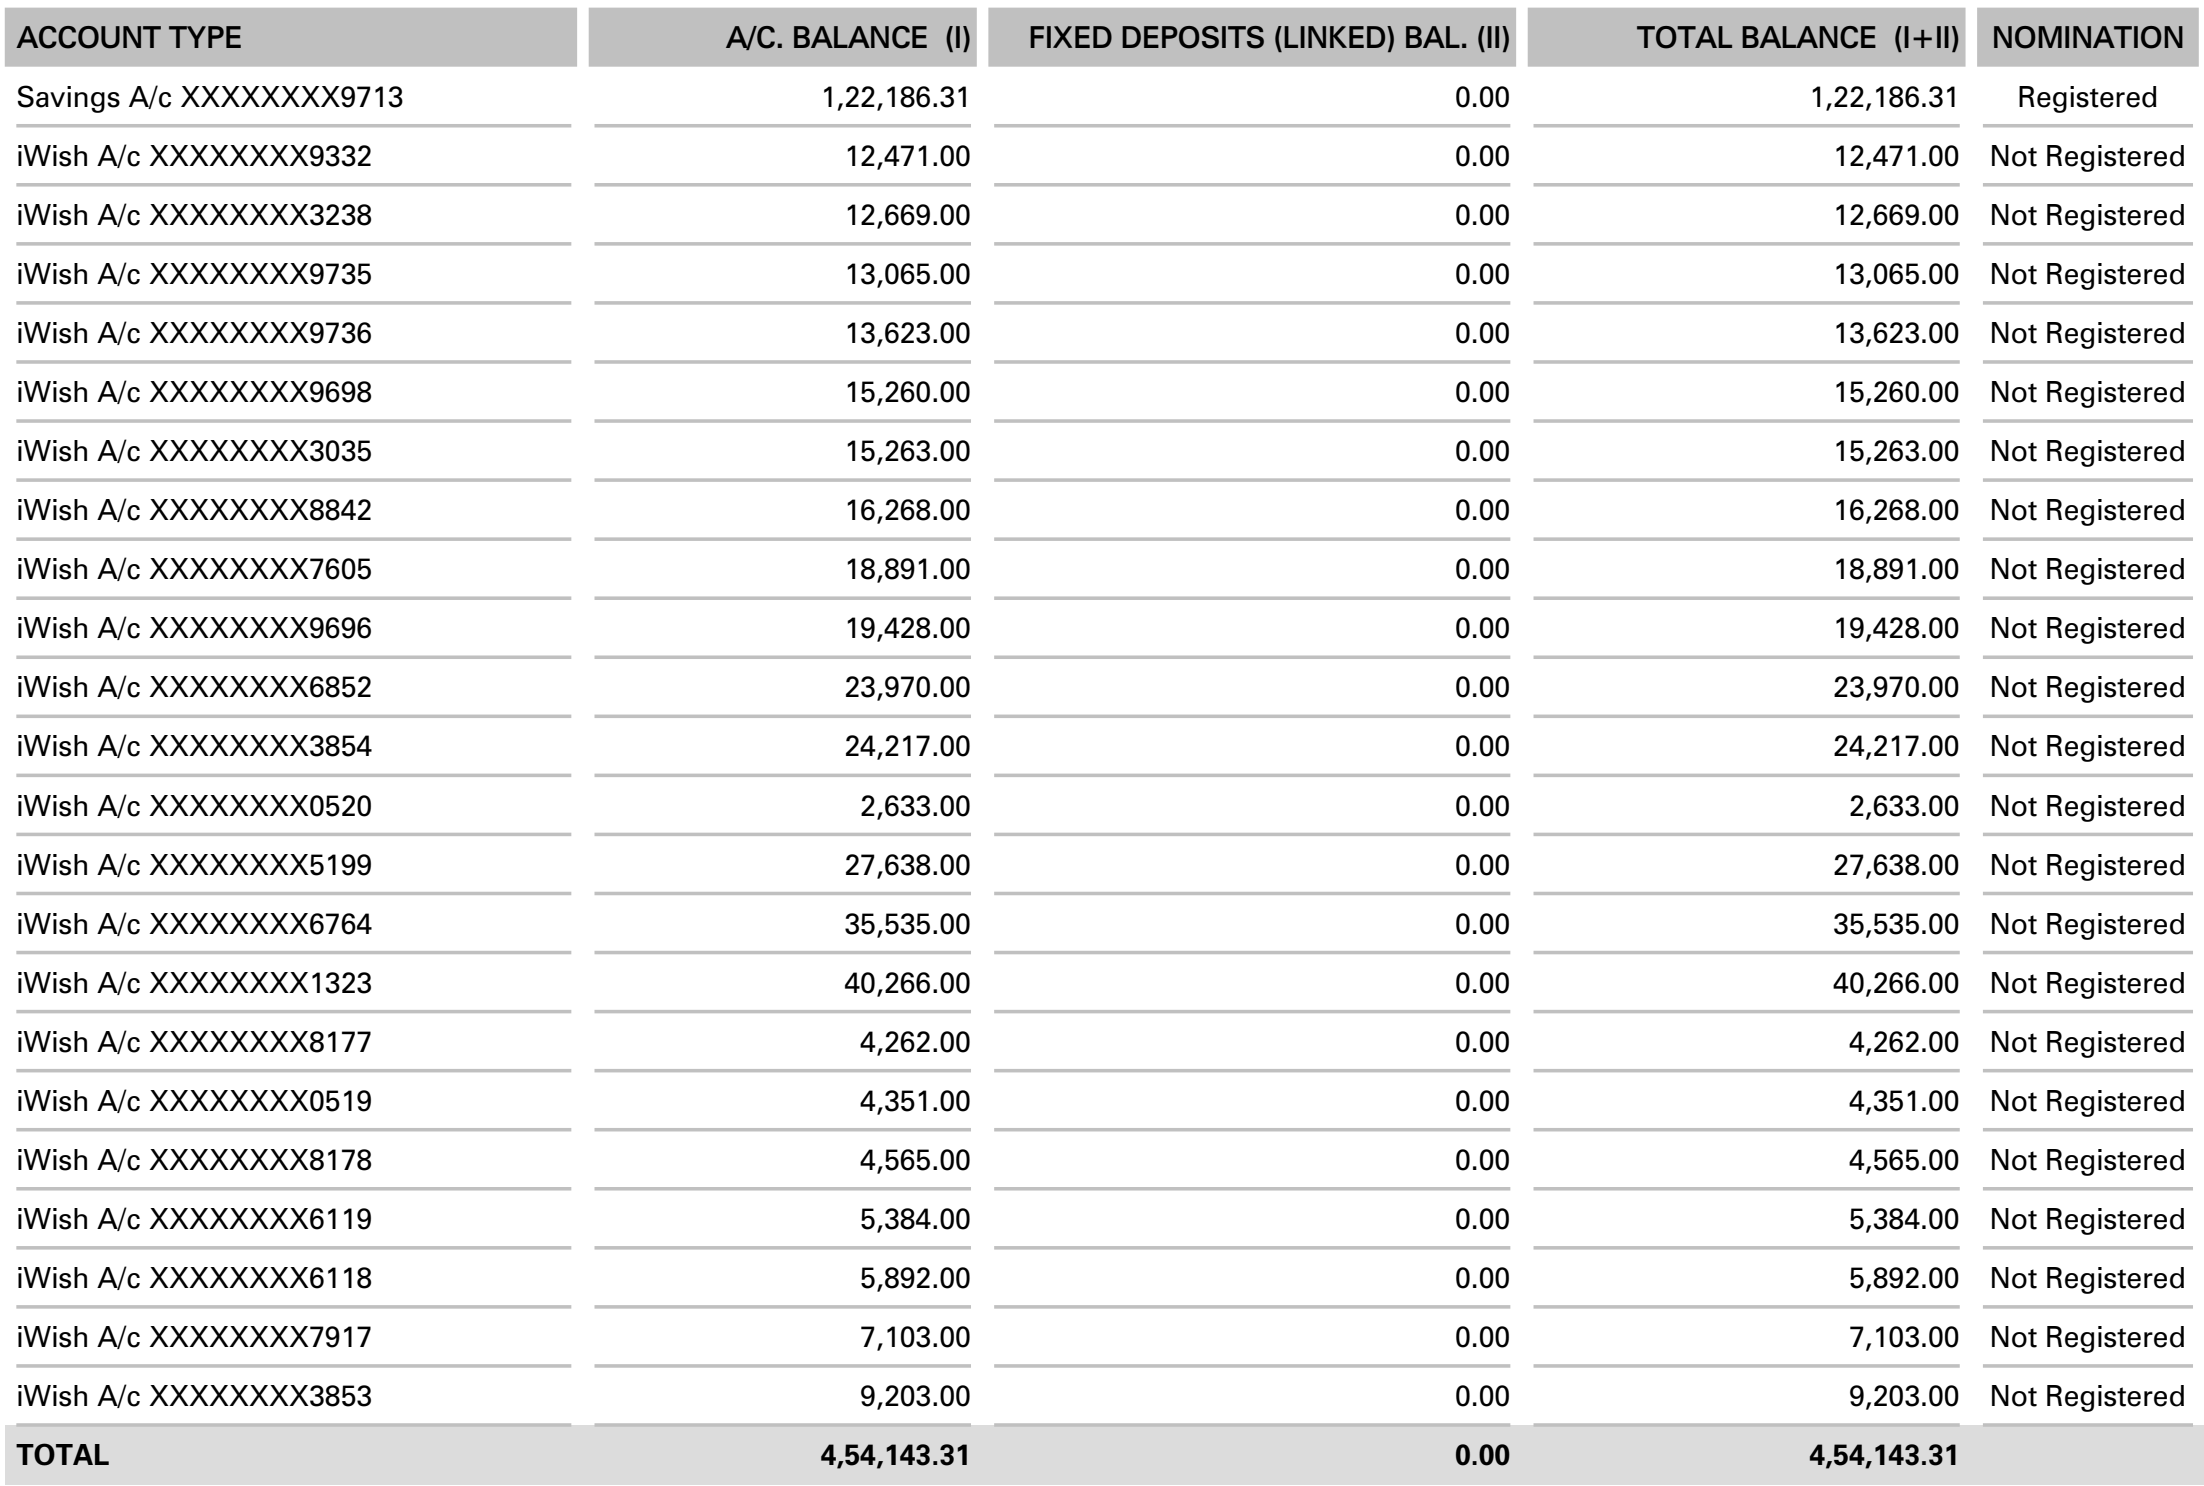

(0.4495, 8.7913, 7.8061, 10.0048)
[135, 2639, 2344, 3004]


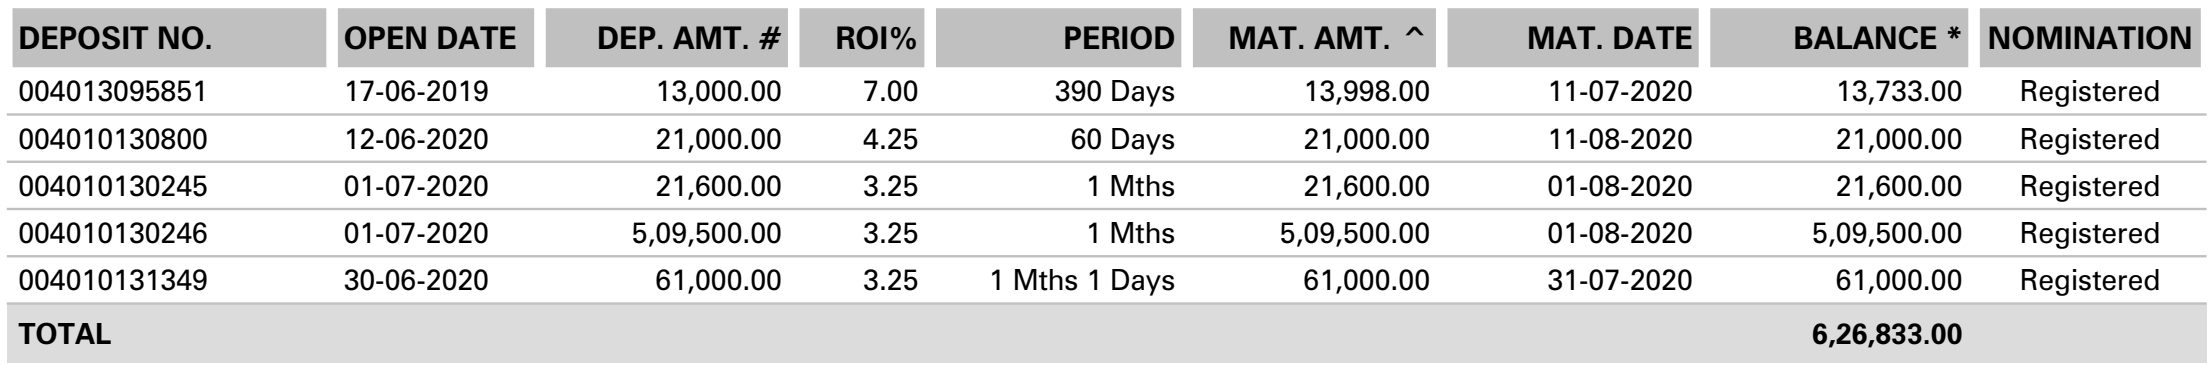

(0.4563, 10.2177, 7.7977, 10.7891)
[137, 3068, 2341, 3239]


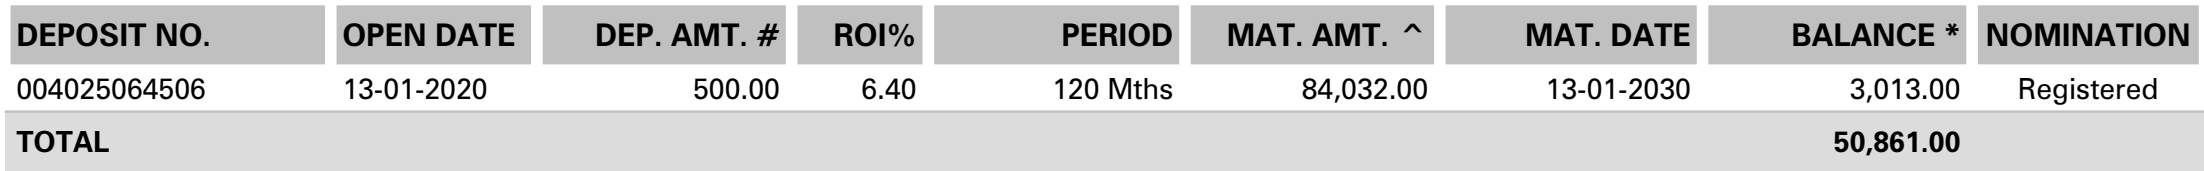

(0.4611, 1.4266, 7.8083, 2.3307)
[138, 428, 2344, 700]


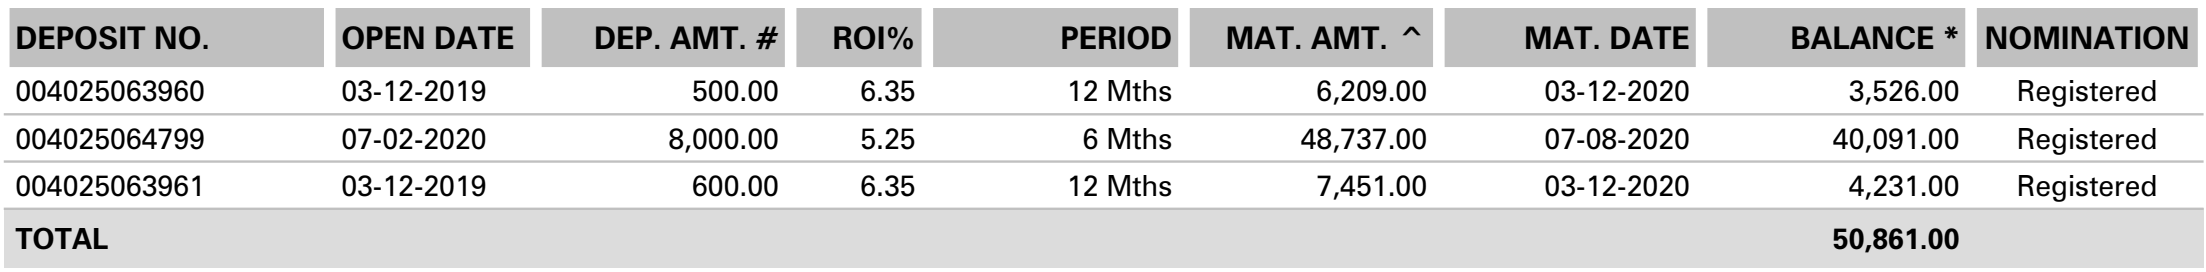

(0.4381, 2.7408, 7.8184, 10.8025)
[132, 823, 2347, 3243]


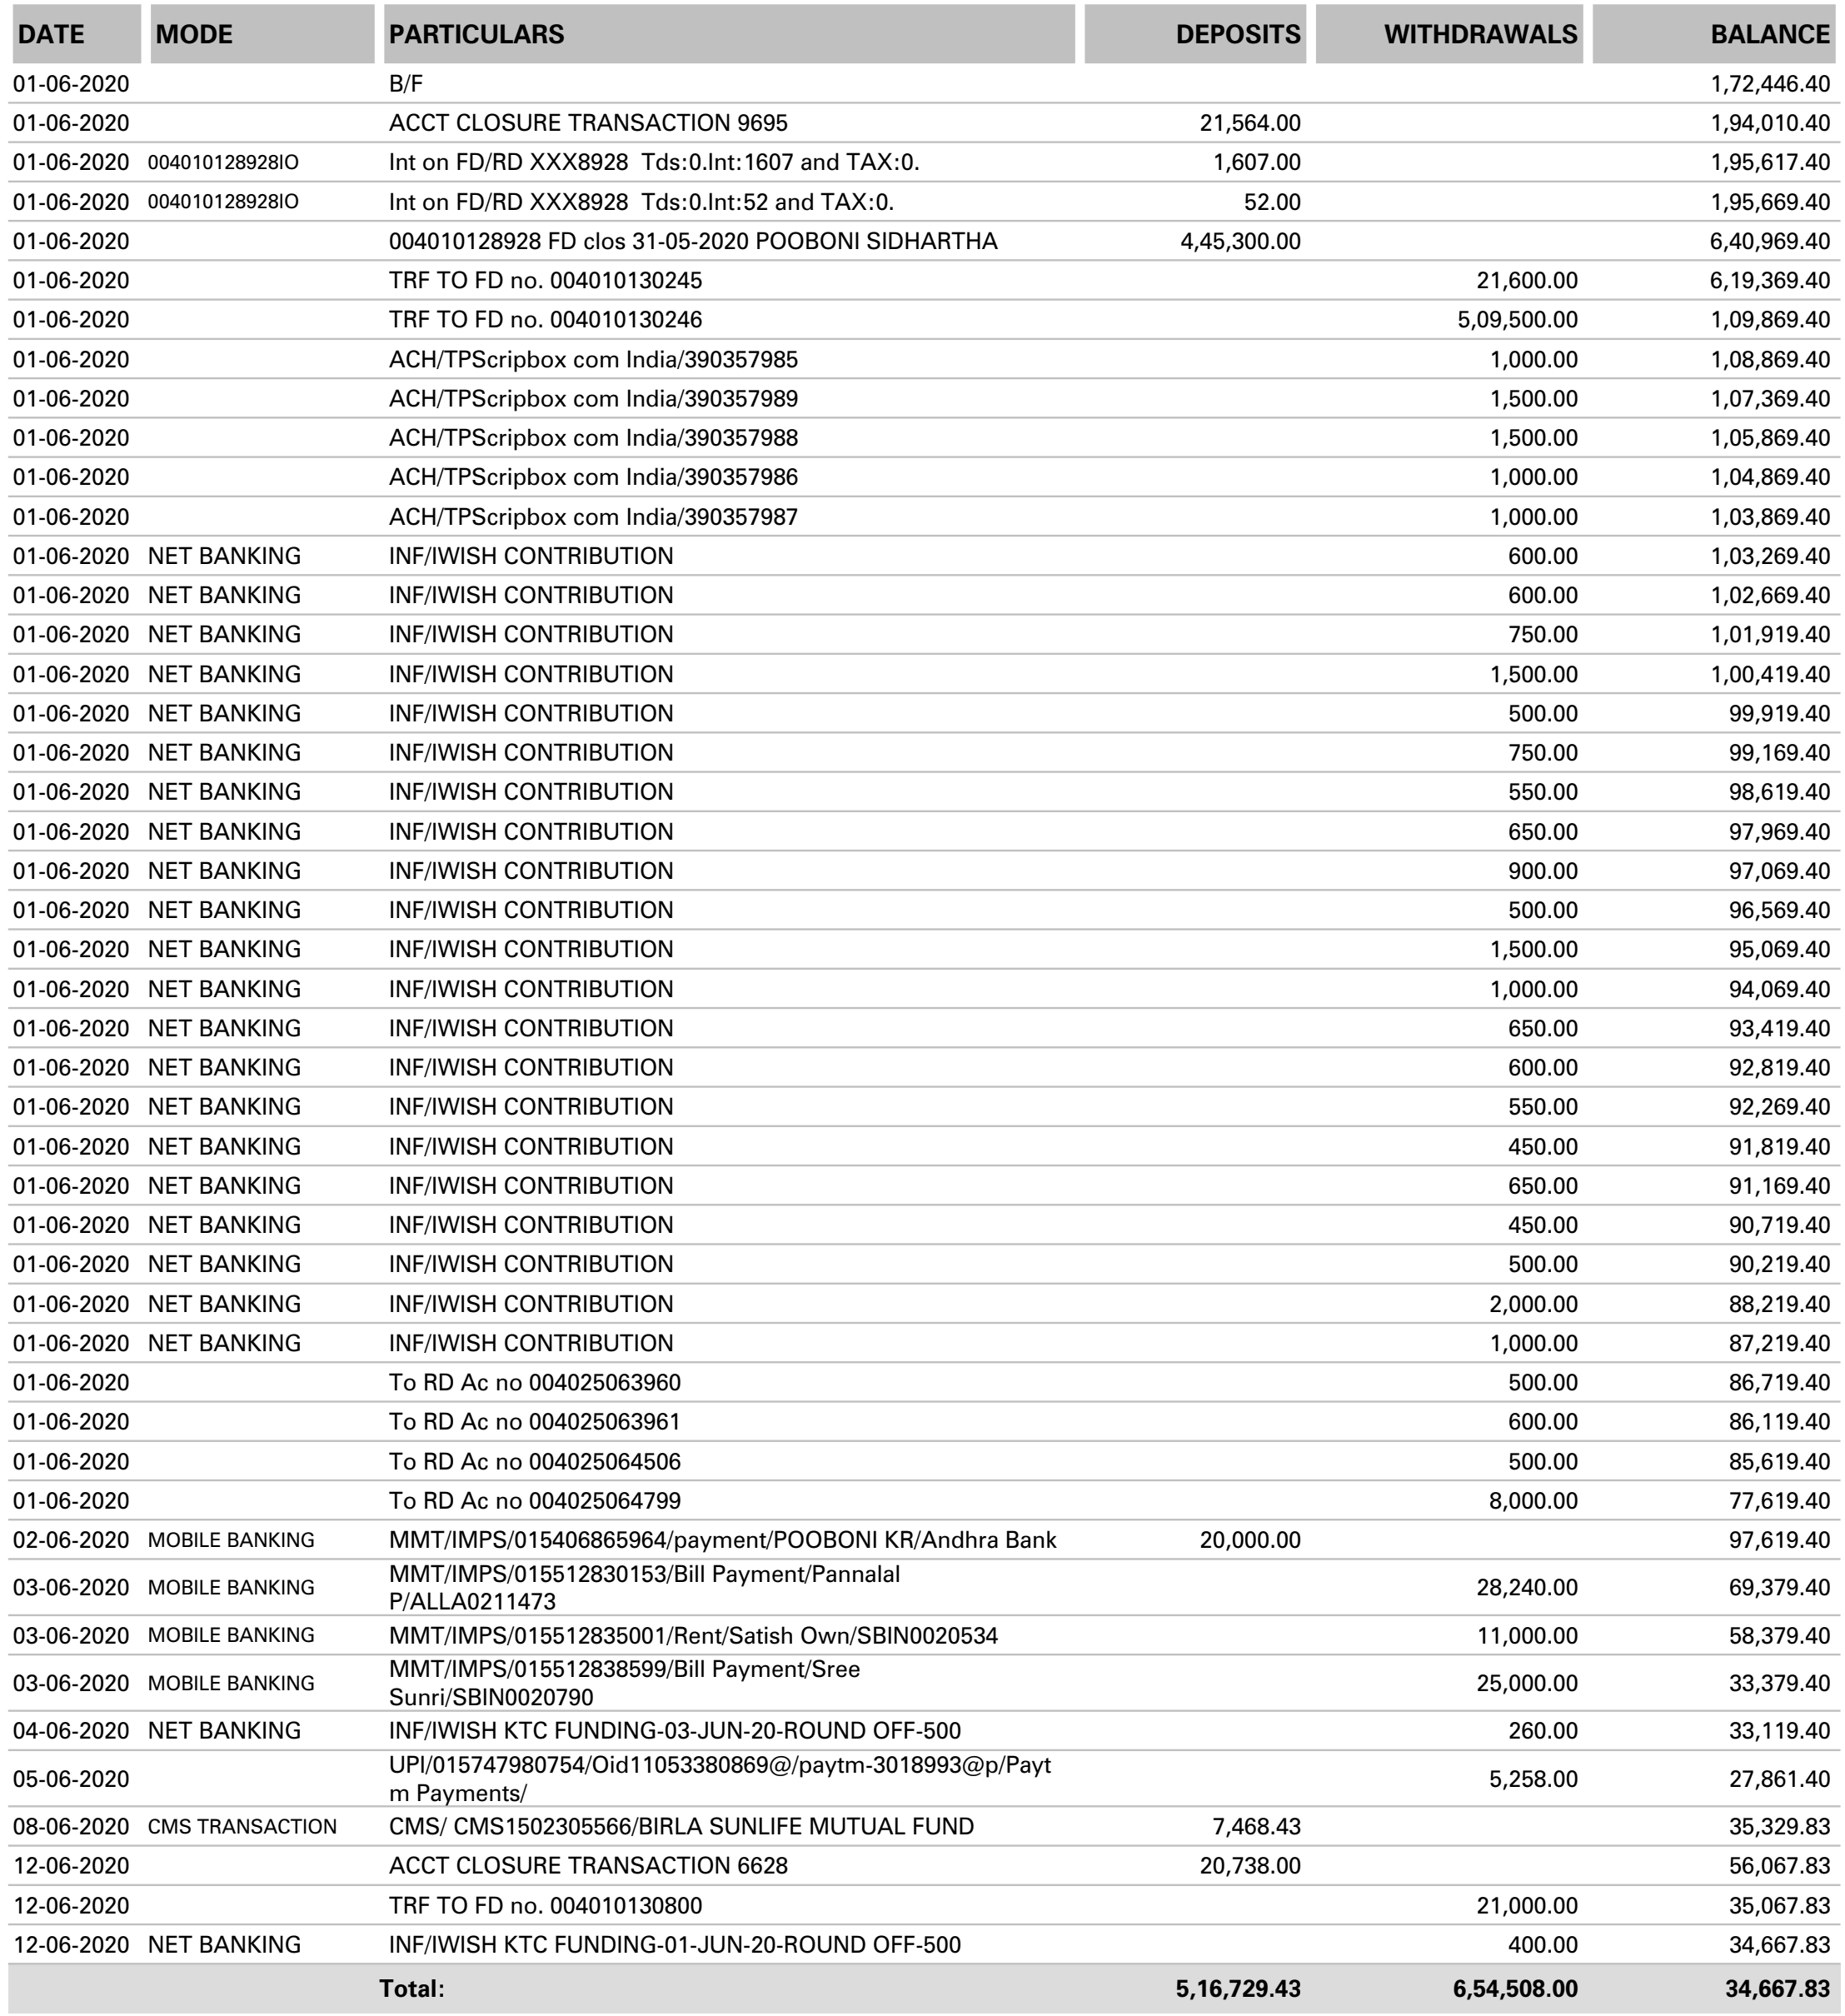

(0.4519, 1.441, 7.8189, 5.5698)
[136, 433, 2347, 1672]


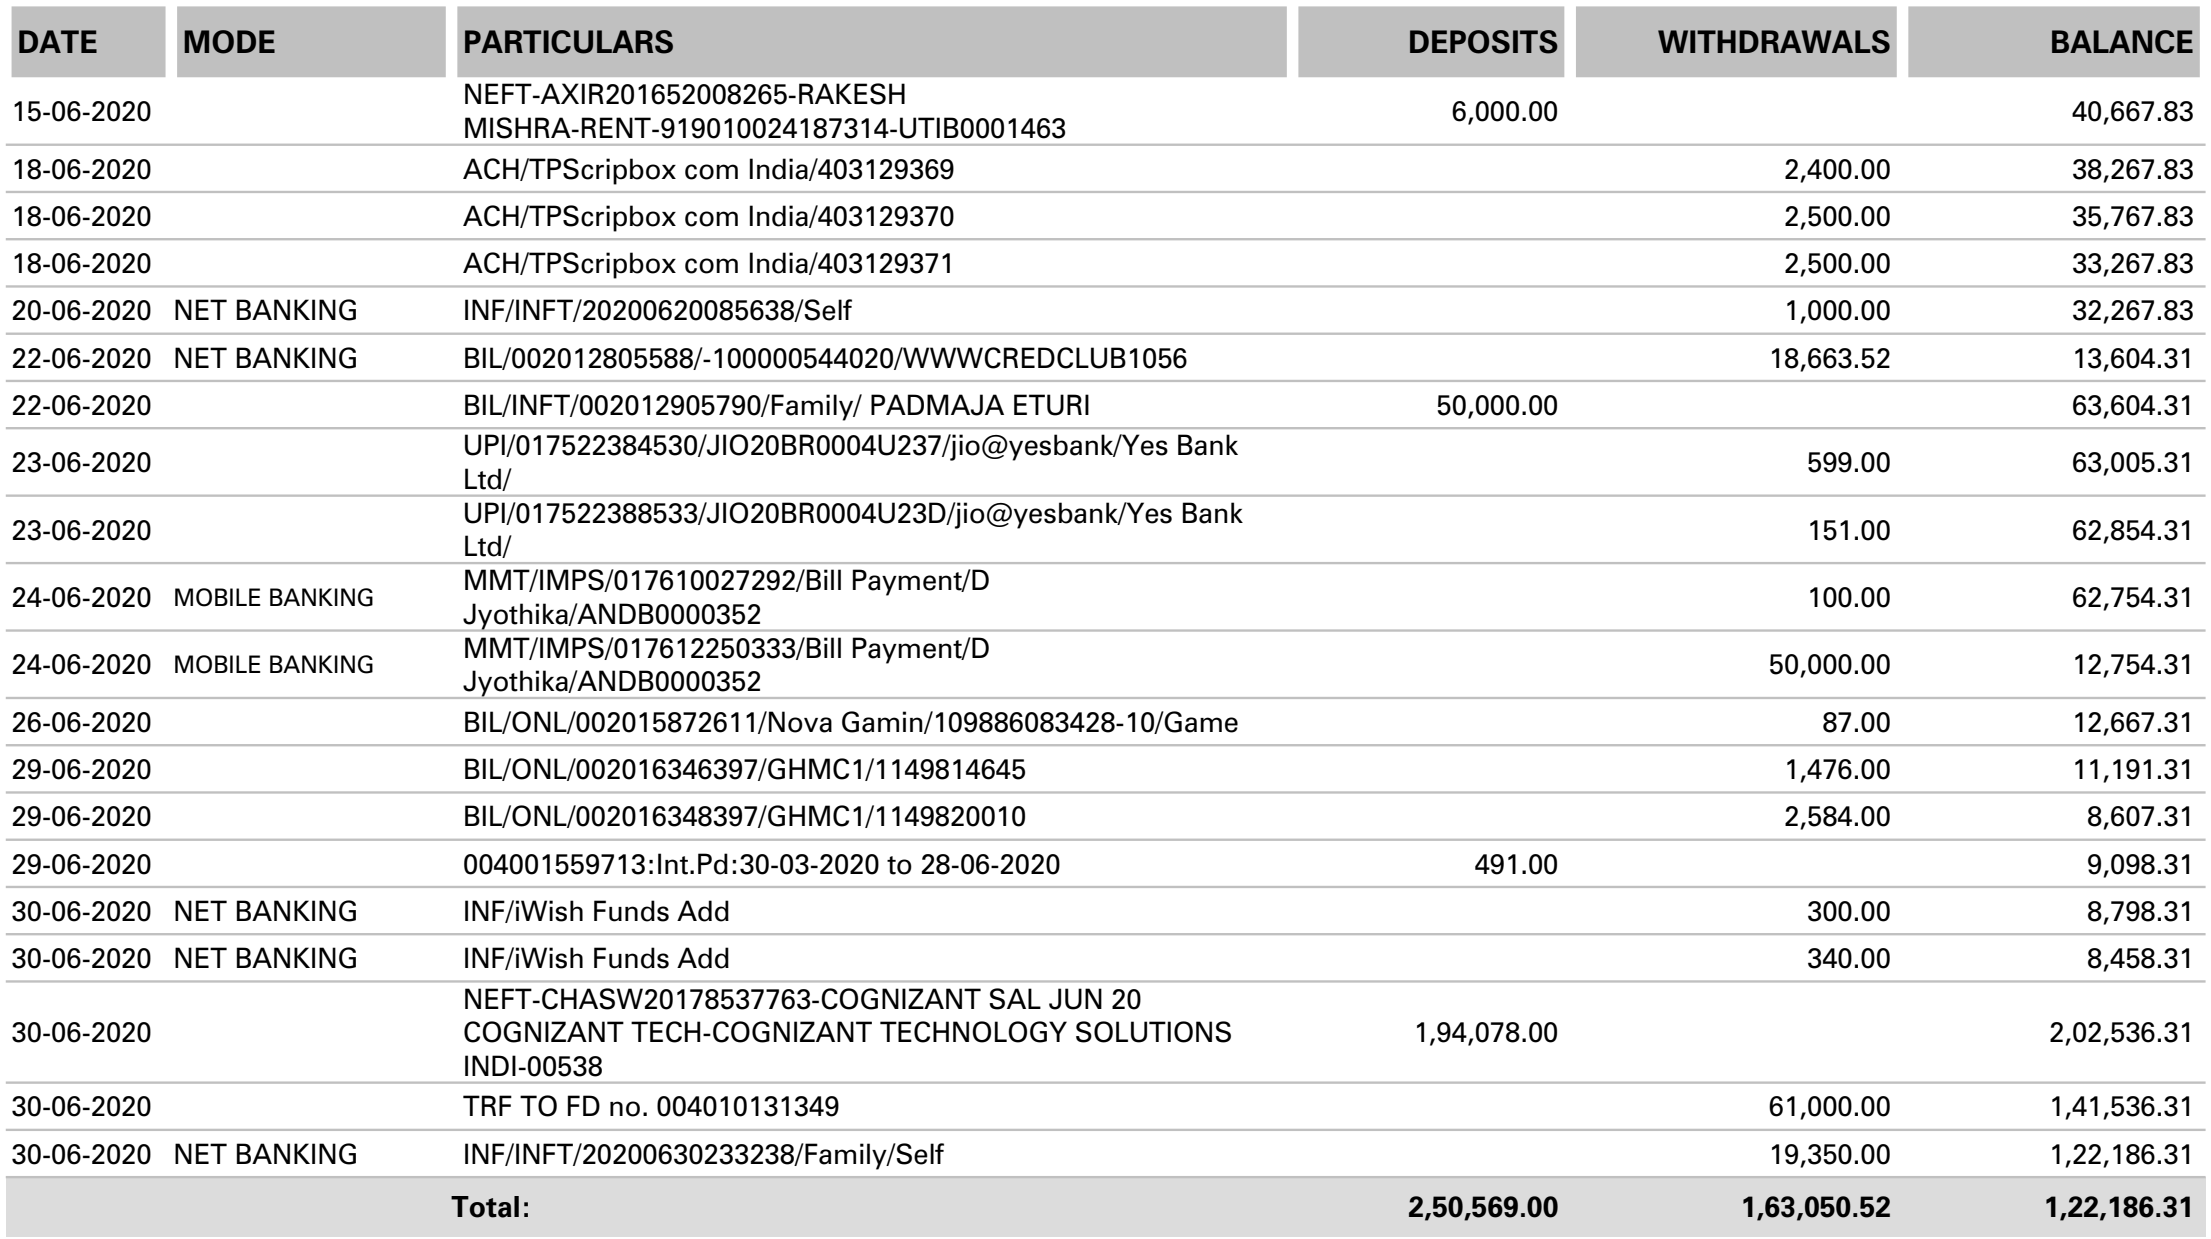

(0.4543, 5.9294, 4.115, 10.7901)
[136, 1780, 1235, 3239]


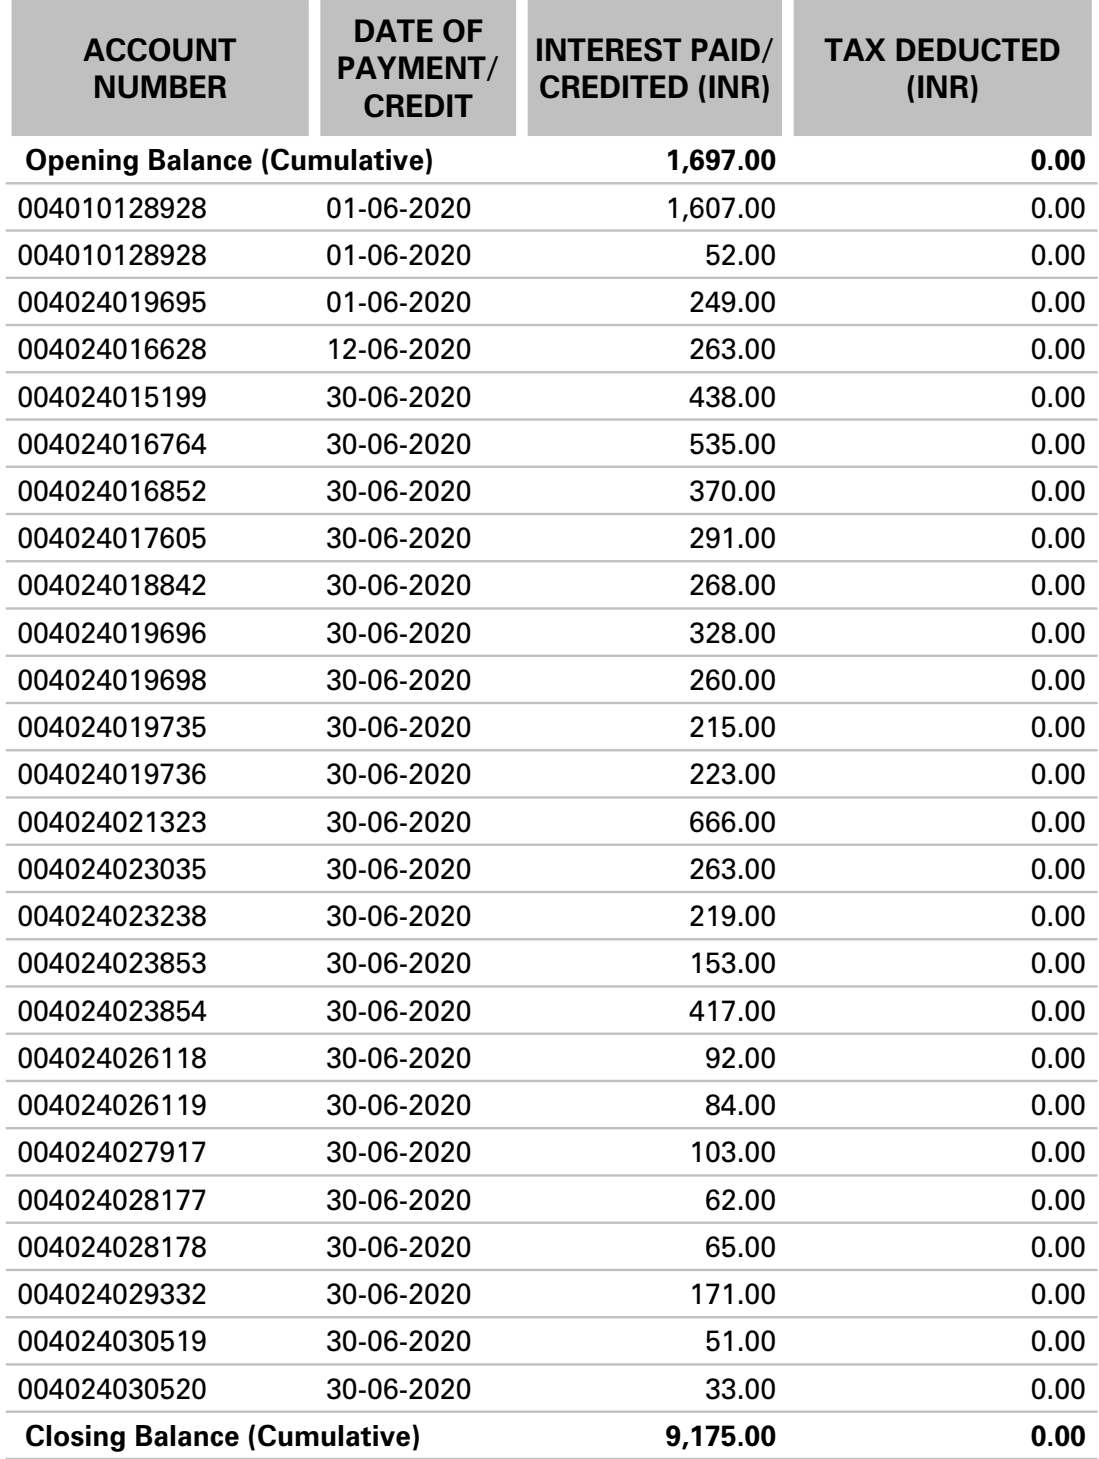

(0.4536, 1.5533, 7.8183, 2.1206)
[136, 466, 2347, 637]


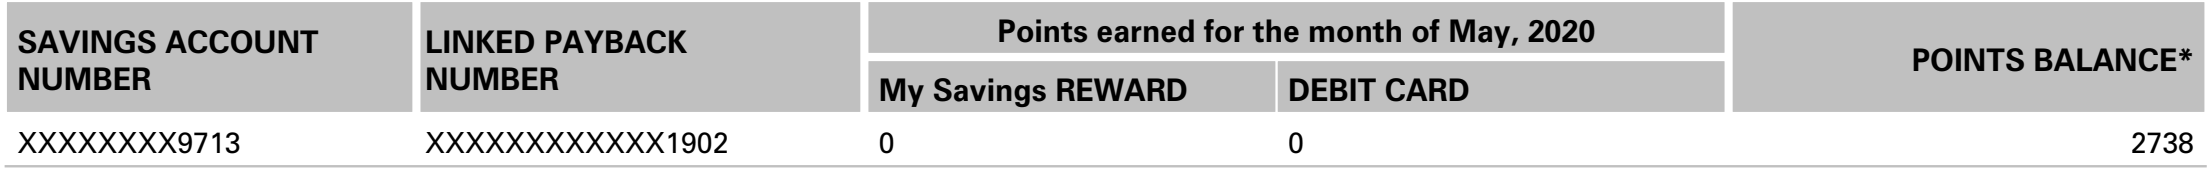

(0.4365, 2.773, 7.829, 3.1852)
[131, 833, 2350, 956]


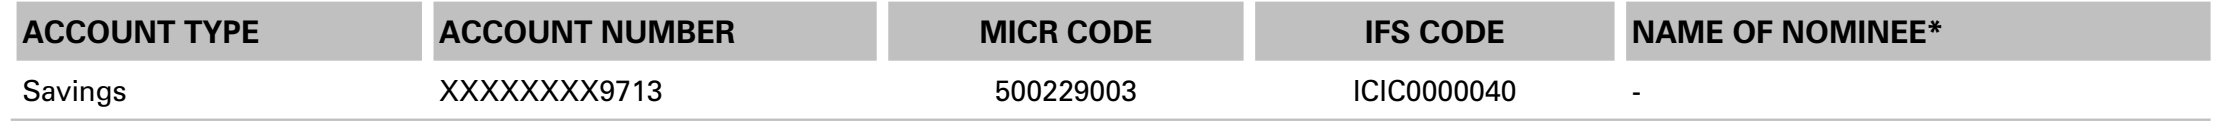

(2.5527, 3.5276, 7.8052, 4.2022)
[766, 1059, 2343, 1262]


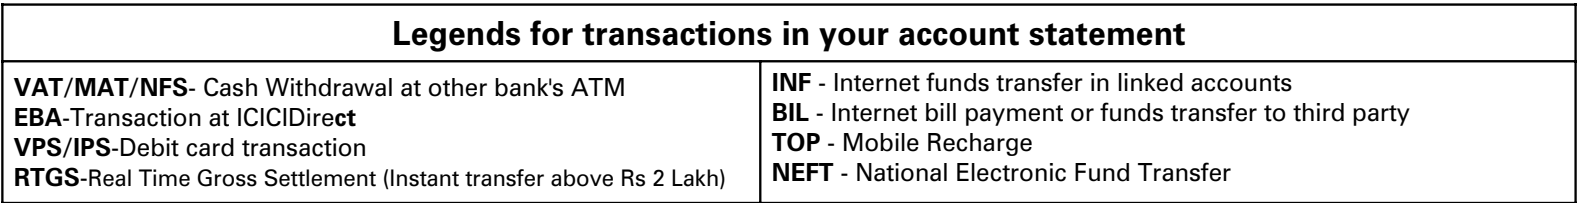

In [57]:
filename = "/workspaces/UI-PATH-HACKATHON-DOCUMENT-PLUS-GITHUB/src/515276832_2020_M06.pdf"
result,poller = AzureReadModule(give_byte_arr(filename))

In [3]:
one = poller.result().tables[0].to_dict()

In [12]:
one['bounding_regions'][0]['page_number']
    

1

In [13]:
polygon = one['bounding_regions'][0]['polygon']
out = ", ".join(["[{}, {}]".format(p['x'], p['y']) for p in polygon])

In [14]:
out

'[2.4805, 6.7345], [5.3301, 6.7356], [5.3308, 7.7196], [2.4807, 7.7185]'

In [31]:
polygon

[{'x': 2.4805, 'y': 6.7345},
 {'x': 5.3301, 'y': 6.7356},
 {'x': 5.3308, 'y': 7.7196},
 {'x': 2.4807, 'y': 7.7185}]

In [33]:
x1 , y1 = polygon[0]['x'], polygon[0]['y']
x2 , y2 = polygon[2]['x'], polygon[2]['y']

In [34]:
box = x1, y1, x2,y2

In [35]:
box

(2.4805, 6.7345, 5.3308, 7.7196)

In [36]:
output

NameError: name 'output' is not defined

In [6]:
#!pip install pypdfium2
import pypdfium2 as pdfium

In [53]:
height = poller.result().pages[0].height
width = poller.result().pages[0].width
pdf = pdfium.PdfDocument("/workspaces/UI-PATH-HACKATHON-DOCUMENT-PLUS-GITHUB/src/3.pdf")
page = pdf.get_page(0)
pil_image = page.render(scale = 300/72).to_pil()
img_size = pil_image.size
pdf_size = (width,height)

In [54]:
img_size

(2550, 3301)

In [46]:
def convert_inches_to_pix(bbox, pdf_size,img_size):
   x1, y1, x2, y2 = bbox
   x1_, x2_ = x1 * img_size[0] /pdf_size[0] , x2 * img_size[0] /pdf_size[0]
   y1_, y2_ = y1 * img_size[0] /pdf_size[0] , y2 * img_size[0] /pdf_size[0]
   bbox_new = map(round , [x1_,y1_,x2_,y2_])
   return list(bbox_new)

In [49]:
pdf_size

(8.5, 11.0)

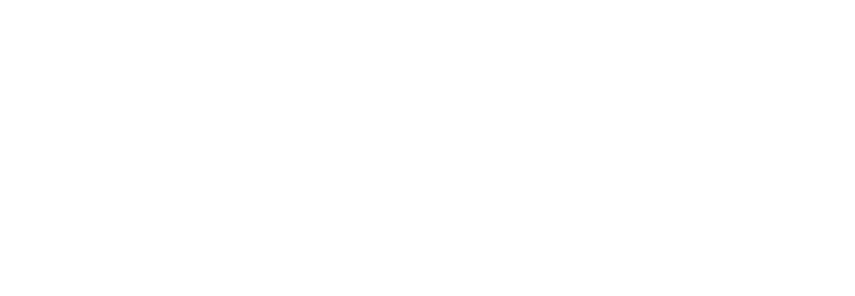

In [52]:
crop_coordinates = convert_inches_to_pix(box, pdf_size,img_size)
cropped_img = pil_image.crop(crop_coordinates)
cropped_img.show()

In [38]:
height = poller.result().pages[1].height
width = poller.result().pages[1].width

In [19]:
from PIL import Image

def crop_image(input_pdf_path, page_number, coordinates):

    pdf_document = fitz.open(input_pdf_path)

    # Get the page
    page = pdf_document[page_number - 1]  # MuPDF uses 0-based indexing

    # Get the page as a pixmap
    pix = page.get_pixmap()

    # Convert the pixmap to a PIL Image
    img = Image.frombytes("RGB", [pix.width, pix.height], pix.samples)
    

    # Convert coordinates to integers
    coordinates = [(int(coord['x']), int(coord['y'])) for coord in coordinates]

    # Crop the image
    cropped_img = img.crop(coordinates)

    # Save the cropped image
    cropped_img.save('sample.jpg')

In [20]:
coordinates = [
    {'x': 2.4805, 'y': 6.7345},
    {'x': 5.3301, 'y': 6.7356},
    {'x': 5.3308, 'y': 7.7196},
    {'x': 2.4807, 'y': 7.7185}]

In [ ]:
def process_box(box,size):
    w, h = size
    x1, y1, x2,y2 = box
    x1,y1, x2, y2 = x1/w , y1/h , x2/w , y2/h
    return [[x1,y1],[x2,y1],[x2,y2],[x1,y2]

In [ ]:
poller.result().tables

In [ ]:
process_box()

In [40]:
pixel_coordinates = [
    {'x': int(coord['x'] * width), 'y': int(coord['y'] * height)}
    for coord in box
]

TypeError: 'float' object is not subscriptable

In [34]:
pixel_coordinates

[{'x': 21, 'y': 74},
 {'x': 45, 'y': 74},
 {'x': 45, 'y': 84},
 {'x': 21, 'y': 84}]

In [35]:
crop_image("/workspaces/UI-PATH-HACKATHON-DOCUMENT-PLUS-GITHUB/src/3.pdf", 1, pixel_coordinates)

ValueError: Coordinate 'lower' is less than 'upper'

In [16]:
import fitz  # PyMuPDF
from PIL import Image

def crop_pdf_and_save_image(input_pdf_path, output_image_path, bounding_box):
    # Open the PDF file
    pdf_document = fitz.open(input_pdf_path)

    # Get the page number and polygon coordinates
    page_number = bounding_box['page_number'] - 1  # MuPDF uses 0-based indexing
    polygon = bounding_box['polygon']

    # Get the page and calculate the bounding box
    page = pdf_document[page_number]
    rect = fitz.Rect(polygon[0]['x'], polygon[0]['y'], polygon[2]['x'], polygon[2]['y'])

    # Crop the page
    page.set_cropbox(rect)
    page = pdf_document[page_number]

    # Get the cropped region as a pixmap
    pix = page.get_pixmap()

    # Save the pixmap as a PNG image
    pix.writePNG(output_image_path)

    # Close the PDF document
    pdf_document.close()

# Example usage
input_pdf_path = "/workspaces/UI-PATH-HACKATHON-DOCUMENT-PLUS-GITHUB/src/3.pdf"
output_image_path = 'output_cropped_image.png'
bounding_box = {'page_number': 1,
  'polygon': [{'x': 2.4805, 'y': 6.7345},
   {'x': 5.3301, 'y': 6.7356},
   {'x': 5.3308, 'y': 7.7196},
   {'x': 2.4807, 'y': 7.7185}]}

crop_pdf_and_save_image(input_pdf_path, output_image_path, bounding_box)


AttributeError: 'Pixmap' object has no attribute 'writePNG'